# <center>Task DL</center>
## <center> Salih Ekici - 3acs - r0883622 </center>

For this task, we were tasked with making our own image classifiers using keras. I decided to make an image classifier for cats, dogs, kangaroos, sharks and pandas.

In [77]:
#%pip install requests selenium lxml matplotlib numpy tensorflow pandas seaborn

This is a scraper that I took from our first orientation project. I modified it so that it would download from the specified 5 categories, download 150 images of each category, split it in a 80 20 split while downloading the pictures.

In [78]:
# import time
# import os
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from bs4 import BeautifulSoup
# import requests

# my_keywords = ["dog", "cat", "kangaroo", "panda", "shark"]

# # Define the split ratio
# split_ratio = 0.8  # 80% for training, 20% for testing

# # Define the number of images to download for each keyword
# images_per_keyword = 150  # You can change this to your desired number

# def get_img_urls(keyword):
#     driver = webdriver.Chrome()
#     driver.get(f"https://www.google.com/search?q={keyword}&tbm=isch")

#     time.sleep(5)
#     for i in range(images_per_keyword//25):
#         driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
#         time.sleep(0.5)
#     soup = BeautifulSoup(driver.page_source, 'lxml')
#     driver.quit()
#     img_tags = soup.findAll('img')
#     img_urls = []

# get the tags of the html elements
#     for img_tag in img_tags:
#         if img_tag.has_attr('data-src'):
#             img_url = img_tag['data-src']
#             img_class = img_tag.get('class')

# check if no69gc is not in the tags. this tag is used for favicons on google images
#             if 'no69gc' not in img_class:
#                 img_urls.append(img_url)

#     return img_urls

# def download_image(url, keyword, index, target_dir):
#     response = requests.get(url)
#     filename = f"{keyword}_{index + 1}.jpg"  # Create the filename
#     file_path = os.path.join(target_dir, filename)
    
#     with open(file_path, "wb") as file:
#         file.write(response.content)

# # Set the 'test' directory
# test_dir = "datasets/animals/test"

# # Create 'training' directory if it doesn't exist
# training_dir = "datasets/animals/training"
# if not os.path.exists(training_dir):
#     os.makedirs(training_dir)

# for keyword in my_keywords:
#     img_urls = get_img_urls(keyword)
#     num_images = len(img_urls)
    
#     # Limit the number of images to download for this keyword
#     num_to_download = min(images_per_keyword, num_images)
    
#     num_training = int(num_to_download * split_ratio)
    
#     for i, img_url in enumerate(img_urls[:num_to_download]):
#         if i < num_training:
#             target_dir = os.path.join(training_dir, keyword)
#         else:
#             target_dir = os.path.join(test_dir, keyword)

#         # Create the subdirectory if it doesn't exist
#         if not os.path.exists(target_dir):
#             os.makedirs(target_dir)

#         download_image(img_url, keyword, i, target_dir)


Import all of the necessary libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import joblib
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [80]:

# Choose the number of classes that you will be working with
NUM_CLASSES = 5
# choose the image size
IMG_SIZE = 128
# There is no shearing option anymore, but there is a translation option
HEIGTH_FACTOR = 0.2
WIDTH_FACTOR = 0.2

# Create a sequential model with a list of layers
model = tf.keras.Sequential([
  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to normalize the values of the pixels
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  layers.RandomTranslation(HEIGTH_FACTOR,WIDTH_FACTOR),
  layers.RandomZoom(0.2),
  # add a conv2d filter that will go over the image from left to right calculating filter maps
  layers.Conv2D(32, (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  # turn off 20% of the nodes in a random order so you dont overfit the model
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),

  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
])

# Compile and train your model as usual
# Compile and train your model as usual
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [81]:
# Set the parameters for your data
batch_size = 32
image_size = (128, 128)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='./datasets/animals/training',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='./datasets/animals/training',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Create the testing dataset from the 'test' directory
test_ds = image_dataset_from_directory(
    directory='./datasets/animals/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=image_size
)


Found 600 files belonging to 5 classes.
Using 480 files for training.
Found 600 files belonging to 5 classes.
Using 120 files for validation.
Found 150 files belonging to 5 classes.


In [82]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30
)
model.save("model.h5")

loaded_model = tf.keras.models.load_model("model.h5")

joblib.dump(loaded_model,"model.pkl")

Epoch 1/30


15/15 [==============================] - 6s 324ms/step - loss: 1.5212 - accuracy: 0.3208 - val_loss: 1.4228 - val_accuracy: 0.3750
Epoch 2/30
15/15 [==============================] - 5s 305ms/step - loss: 1.3901 - accuracy: 0.3938 - val_loss: 1.3605 - val_accuracy: 0.3750
Epoch 3/30
15/15 [==============================] - 5s 315ms/step - loss: 1.3061 - accuracy: 0.3917 - val_loss: 1.3241 - val_accuracy: 0.4333
Epoch 4/30
15/15 [==============================] - 5s 307ms/step - loss: 1.2749 - accuracy: 0.4313 - val_loss: 1.2796 - val_accuracy: 0.4750
Epoch 5/30
15/15 [==============================] - 5s 325ms/step - loss: 1.2517 - accuracy: 0.4646 - val_loss: 1.2682 - val_accuracy: 0.4583
Epoch 6/30
15/15 [==============================] - 5s 332ms/step - loss: 1.2494 - accuracy: 0.4812 - val_loss: 1.2438 - val_accuracy: 0.4750
Epoch 7/30
15/15 [==============================] - 5s 310ms/step - loss: 1.1977 - accuracy: 0.5125 - val_loss: 1.2059 - val_accuracy: 0.4500
Epoch 8/30
15/15 

C:\Users\Salih Ekici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['model.pkl']

In [ ]:
category_names = ['cat', 'dog', 'kangaroo', 'panda', 'shark']
image_directory = "single_images"  # Replace with the actual path to your image directory

# Get a list of image file names in the directory
image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith(".jpg")]

# Iterate over the images and make predictions
for image_path in image_files:
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels

    # Preprocess the image to match the input format of your model
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image data

    # Make predictions using the model
    predictions = loaded_model.predict(img)
    class_index = np.argmax(predictions)
    class_name = category_names[class_index]  # Replace with your category names

    # Display the predicted class
    plt.title(f"Predicted Class: {class_name}")
    plt.show()

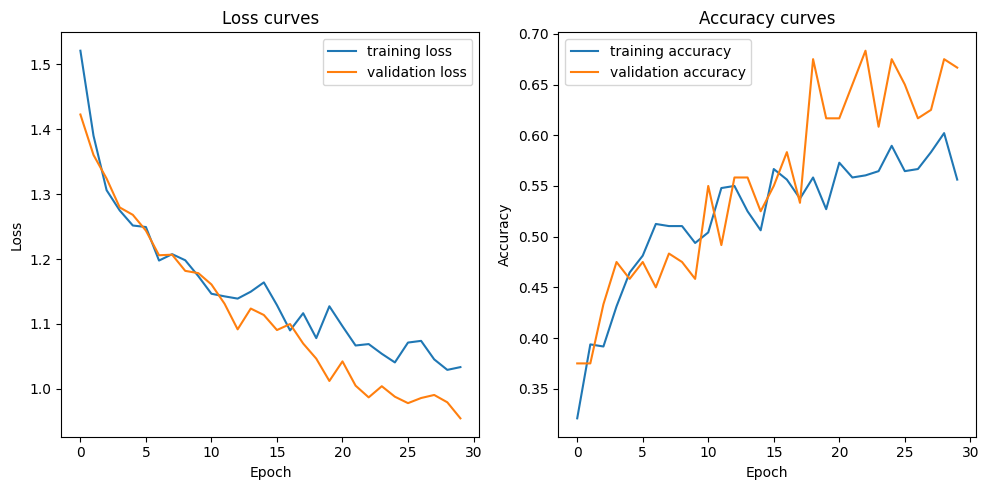

In [83]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

lets check the accuracy of the model on the test dataset

In [84]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy (model):', test_acc)

5/5 [==============================] - 0s 66ms/step - loss: 1.1309 - accuracy: 0.5133
Test accuracy (model): 0.5133333206176758


1/1 [==============================] - 0s 115ms/step


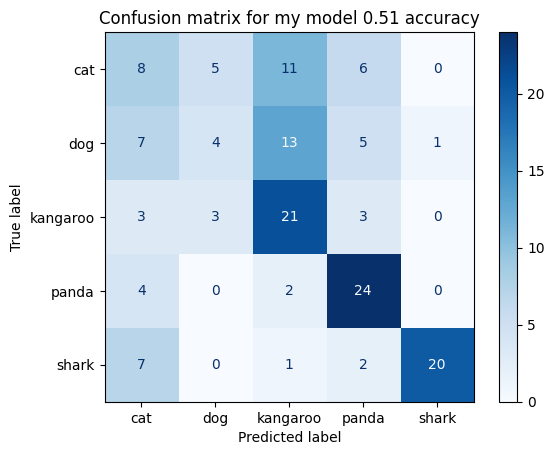

In [86]:

# Make predictions on the test dataset
y_true = []
y_pred = []

for x, labels in test_ds:
    y_true.extend(np.argmax(labels, axis=1))  # True labels
    y_pred.extend(np.argmax(loaded_model.predict(x), axis=1))  # Predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with category names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion matrix for my model {round(test_acc,2)} accuracy")
plt.show()


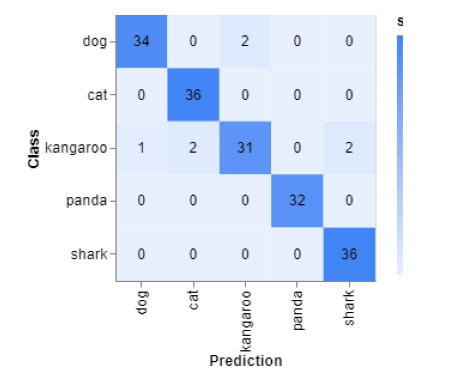

In [87]:
# Define the path to your image file
image_path = "teachable machine.png"  # Replace with the actual path to your image

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

As we can see, the teachable machine by google outperforms our model by a large margin. To be able to raise our accuracy, we ould play around with the batch size, epochs, image size and so on. But the biggest help would be to use more training images.

## GenAI usage

I used gen ai during the plotting of the matrices

I used some code from the cats&dogs exercise